# NumPy

Let's go over some of the fundamentals of NumPy...This notebook is just meant to introduce some of the vocabulary, indexing, and some useful functions/methods. Consult the documentation as needed for more!

- NumPy was developed for fast computation with large arrays
- Fast vectorized operations without need for loops
- C API for connecting NumPy with libraries written in C, C++, FORTRAN

- NumPy stores data internally in large contiguous blocks of memory
- NumPy libraries written in C and act on memory without Python interpreter overhead
- Much faster than other Python data types

In [96]:
#Get matplotlib.pyplot and numpy:

import matplotlib.pyplot as plt
import numpy as np

### N-Dimensional array object, `ndarray`, is primary data container in NumPy 

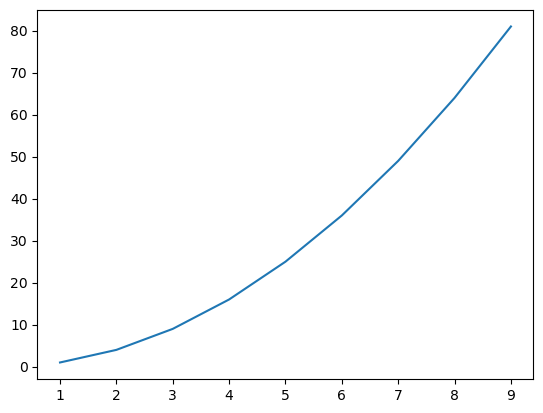

In [97]:
#Let's make a numpy array, and plot
#Already saw some of this
import numpy as np

#One way to make an ndarray (nd = n-dimensional array, very similar to MATLAB arrays/matrices)
x = np.array([1,2,3,4,5,6,7,8,9])

#A better way:
y = np.array(np.arange(1,10))

#Or just:
z = np.arange(1,10)

#And can do simple plot, as before
plt.plot(x, x**2);

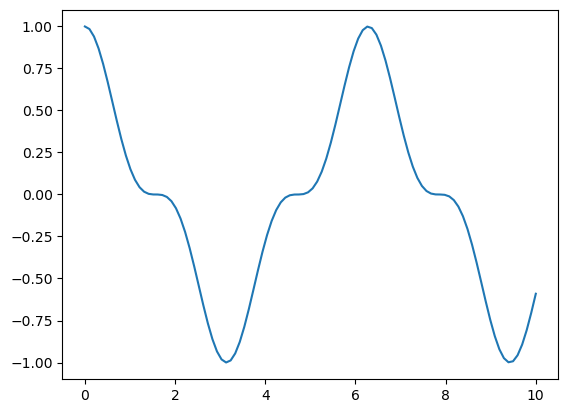

In [98]:
#Another good way to make numpy arrays
####
x = np.linspace(0,10,100)

y = np.cos(x)**3

plt.plot(x,y)

#### `ndarray`s have `ndim`, `shape`, and `dtype`:

In [101]:
data = np.random.randn(2,3).round(2)

display(data)

print(data.ndim)
print(data.shape)
print(data.dtype)

array([[ 0.04,  1.18,  0.63],
       [-1.65,  0.49,  0.56]])

2
(2, 3)
float64


In [105]:
%%time

#numpy is *way* faster than lists
#Can see with the following...
#Do element-wise multiplication a bunch of times...

#Will import time package
import time


arr_list = list(range(0,int(1e6)))
arr_np = np.arange(0,1e6)

#Do list way
####
start = time.time()
for k in range(30):
    arr_list = [i*2 for i in arr_list]

end = time.time()

print('Elapsed: ' + str(end-start))


#Do numpy way
####
start = time.time()
for k in range(30):
    arr_np = arr_np*2

end = time.time()

print('Elapsed: ' + str(end-start))


Elapsed: 2.082080364227295
Elapsed: 0.06752800941467285
CPU times: total: 2.2 s
Wall time: 2.18 s


In [106]:
%%time
#Can also do a quick version using magic %time:
#Above is a magic command applied to whole cell: MUST come on first line of cell (including comments)
#A magic command prefixed with a single % applies to the following line

%time for k in range(100): arr_np = arr_np*2   

CPU times: total: 219 ms
Wall time: 231 ms
CPU times: total: 219 ms
Wall time: 231 ms


#### Some basic numpy types and casting

- `int8`, `int16`, `int32`, `int64`
- `uint8`, `uint16`, `uint32`, `uint64`
- `float8`, `float16`, `float32`, `float64`, `float128`

In [109]:
#Some casting
######

arr_np = np.arange(0, 1e1, dtype=np.float32)
print(arr_np)

#And cast:
arr_np = arr_np.astype(np.int64)

print(arr_np)
type(arr_np[0])

#######
#See:
# https://numpy.org/doc/stable/user/basics.types.html
# https://numpy.org/doc/stable/reference/arrays.scalars.html#sized-aliases
#######

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


numpy.int64

In [111]:
#Note scalars of different types:
f16 = np.float16(.1)
f32 = np.float32(.1)
f64 = np.float64(.1)

print(f16 == f32)
print(f32 == f64)


False
False


In [112]:
#Note overflow: This can be source of cryptic error
u32 = np.int32(2)
u32 = u32**31
u32

-2147483648

### Multi-dimensional arrays

More on creating arrays...There are many built-in functions for making arrays, in addition to `array`:

In [113]:
#A random array
###
rand_arr = np.random.rand(4,3).round(2)

rand_arr

array([[0.3 , 0.42, 0.38],
       [0.26, 0.33, 0.15],
       [0.81, 0.88, 0.51],
       [0.31, 0.67, 0.54]])

In [114]:
#Ones:
A = np.ones([2,3])
A


array([[1., 1., 1.],
       [1., 1., 1.]])

In [115]:
#Note type:
A.dtype

dtype('float64')

In [120]:
#Zeros
B = np.zeros([3,5], dtype=np.int32)
B

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

In [125]:
#Empty:

C = np.empty([5,3])
C

array([[ 1.,  2.,  3.],
       [ 4.,  5.,  6.],
       [ 7.,  8.,  9.],
       [10., 11., 12.],
       [13., 14., 15.]])

In [126]:
#Identity:

I = np.eye(5,5) #Or identity
I

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [127]:
#And can make an array this way:
A = np.array([[1,2,3], [4,5,6]])
A

array([[1, 2, 3],
       [4, 5, 6]])

In [128]:
#Also have ones_like, zeros_like, empty_like:
########

np.ones_like(A)


array([[1, 1, 1],
       [1, 1, 1]])

In [129]:
np.zeros_like(A)

array([[0, 0, 0],
       [0, 0, 0]])

In [130]:
np.empty_like(A)

array([[-1109858768,         512,           0],
       [          0,           1,  1082605568]])

In [132]:
#Can do matrix multiplication
A = np.array([[1,2],[3,4]])
B = np.array([[1, 2], [1,1]])

print(A)
print("")
print(B)

print("")

#Element-wise:
print('Element-wise: \n', A*B)

#Matrix multiplication:
print('\n Matrix multiplication: \n', np.dot(A,B))

#Or:
#print('\n Matrix multiplication: \n', np.matmul(A,B))

[[1 2]
 [3 4]]

[[1 2]
 [1 1]]

Element-wise: 
 [[1 4]
 [3 4]]

 Matrix multiplication: 
 [[ 3  4]
 [ 7 10]]


#### Arithmetic on NumPy arrays:

In [133]:
#Addition, subtraction, scalar multiplication...
A = np.ones([2,3])


A*2 - A*3

array([[-1., -1., -1.],
       [-1., -1., -1.]])

In [136]:
A * .3

array([[0.3, 0.3, 0.3],
       [0.3, 0.3, 0.3]])

In [138]:
#Can do inner (dot) and outer products:
a = np.arange(4)
b = np.array([-2,1,0,3])

np.dot(a,b)

10

In [139]:
np.outer(a,b)

array([[ 0,  0,  0,  0],
       [-2,  1,  0,  3],
       [-4,  2,  0,  6],
       [-6,  3,  0,  9]])

Concatenating:

In [143]:
#Concatenate
A = np.ones([2,2])
B = np.ones([2,2])*2

display(A)

np.concatenate((A,B), axis=0)

array([[1., 1.],
       [1., 1.]])

array([[1., 1.],
       [1., 1.],
       [2., 2.],
       [2., 2.]])

#### Basic Indexing and Slicing

In [149]:
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
#In 1-D, similar to Python lists:
#######

a = np.arange(10)

a[2:5]

a[:-5]
a[-5:-2]

a[::2]
a[::-2]
a[-3:-5:-1]

In [148]:
#Can also use a list in numpy!:
a[[1,3,2]]


array([1, 3, 2])

In [150]:
#Note the duplicates:
a[[1,3,3,3,0,1]]

array([1, 3, 3, 3, 0, 1])

#### Copy vs. reference:

In [153]:
#Recall that slicing makes a copy with lists:
a = [1,2,3,4,5]
b = a[:]

b[0] = 99
a

[1, 2, 3, 4, 5]

In [155]:
#Slicing yields references in numpy:
a = np.arange(10)

#Get a slice
a_slice = a[5:8]
display(a_slice)

#Alter it:
a_slice[0:2] = 99
display(a_slice)

#Original numpy array now?
a

array([5, 6, 7])

array([99, 99,  7])

array([ 0,  1,  2,  3,  4, 99, 99,  7,  8,  9])

In [156]:
#Need to use copy()
a = np.arange(10)

a_slice = a[5:8].copy()
a_slice[0:2] = 99
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

#### Slicing in 2-D...

In [157]:
#In 2-D
#########
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [160]:
#Get just a row:
A[0]

#Or:
A[0, :]

array([1, 2, 3])

In [164]:
#Just a column
A[:,0]

array([1, 4, 7])

In [169]:
#Note this doesn't give a column:
#A[:] is just everything
A[:][0]


array([1, 2, 3])

In [170]:
#More indexing:
A[0:2, 1]

array([2, 5])

In [ ]:
#EXamples:
A[:,1]
A[:,1:2]
A[:,1:3]

A[:2, 1:]

A[0:2,-1]
A[0:2,::-1]

In [171]:
#We can assign single values to slices:
A[1] = 99
A

array([[ 1,  2,  3],
       [99, 99, 99],
       [ 7,  8,  9]])

In [172]:
A[:] = 42
A

array([[42, 42, 42],
       [42, 42, 42],
       [42, 42, 42]])

In [173]:
A[0:2,0:2] = 1

A

array([[ 1,  1, 42],
       [ 1,  1, 42],
       [42, 42, 42]])

In [174]:
#We can cast, but this creates a copy:
######

B = A[0:2,0:2].astype(np.int32)
B[:,:] = 3

display(B)
A

array([[3, 3],
       [3, 3]])

array([[ 1,  1, 42],
       [ 1,  1, 42],
       [42, 42, 42]])

#### 3-D arrays

- Some ways to construct:

In [175]:
a = np.zeros([2,3,4])
a

array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]])

In [176]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [182]:
arr3d.ndim

3

In [183]:
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

#### Boolean Indexing

In [185]:
A = np.array([[1, 2, 3], [4, 5, 6]])
B = np.array([[0, 1, 4], [6, -2, 7]])

print(A, "\n")
print(B, "\n")

#Can do boolean masking similar:
print(A > B, "\n")

#And index by the booleans:
A[A > B]


[[1 2 3]
 [4 5 6]] 

[[ 0  1  4]
 [ 6 -2  7]] 

[[ True  True False]
 [False  True False]] 



array([1, 2, 5])

In [186]:
#Consider also:
####

data = np.array(np.arange(1,29))

data = data.reshape((7,4))

data

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16],
       [17, 18, 19, 20],
       [21, 22, 23, 24],
       [25, 26, 27, 28]])

In [187]:
#Now do boolean indexing:

codes = np.array(['A', 'B', 'C', 'D', 'A', 'E', 'F'])

#codes == 'A'

data[codes == 'A']

array([[ 1,  2,  3,  4],
       [17, 18, 19, 20]])

In [190]:
data[~(codes == 'A')]
#Or:
data[codes != 'A']

array([[ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16],
       [21, 22, 23, 24],
       [25, 26, 27, 28]])

In [194]:
#Can use &, | (Not and, or)
mask = (codes == 'A') | (codes == 'B')

data[mask]

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [17, 18, 19, 20]])

In [196]:
#More masking
####
data[data > 20] = 0
data

data[mask] = -1

data

array([[-1, -1, -1, -1],
       [-1, -1, -1, -1],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16],
       [-1, -1, -1, -1],
       [ 0,  0,  0,  0],
       [ 0,  0,  0,  0]])

#### Re-shaping and transposing

In [197]:
arr = np.arange(15).reshape((3, 5))
print(arr)
arr.T

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]


array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [198]:
#In higher dimensions:
arr = np.arange(16).reshape(2,2,4)
print(arr)

#Re-order with axis 0 as second, axis 1 as first, axis 2 stays third
arr.transpose(1,0,2)

[[[ 0  1  2  3]
  [ 4  5  6  7]]

 [[ 8  9 10 11]
  [12 13 14 15]]]


array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

### Universal Functions

Universal functions perform element-wise operations on ndarrays, often simple *unary* ufuncs:

In [199]:
A = np.arange(10)
A

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [202]:
A = np.arange(10)

print(np.sqrt(A), '\n')

print(np.exp(A))

[0.         1.         1.41421356 1.73205081 2.         2.23606798
 2.44948974 2.64575131 2.82842712 3.        ] 

[1.00000000e+00 2.71828183e+00 7.38905610e+00 2.00855369e+01
 5.45981500e+01 1.48413159e+02 4.03428793e+02 1.09663316e+03
 2.98095799e+03 8.10308393e+03]


#### Act on two arrays, return a single array:

In [203]:
x = np.array([1, 2, 3, 4, 9, 10])
y = np.array([8, 5, 4, 1, 9, 1])

np.maximum(x, y)

array([ 8,  5,  4,  4,  9, 10])

#### Act on a single array, return two arrays:

In [204]:
x = (np.random.randn(7) * 5).round(2)

print(x, '\n')

remainder, whole_part = np.modf(x)

print(whole_part)
print(remainder)

[ 2.54  1.53 -3.37  3.29 -4.95 -7.81 -5.34] 

[ 2.  1. -3.  3. -4. -7. -5.]
[ 0.54  0.53 -0.37  0.29 -0.95 -0.81 -0.34]


### Some Aggregation Functions in numpy

In [205]:
x = np.arange(20).reshape(5,4)
x

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

In [206]:
x.mean()

9.5

In [210]:
x.sum()
x.min()
x.max()
x.std() #or x.var()

5.766281297335398

In [213]:
x.mean(axis=1)

array([ 1.5,  5.5,  9.5, 13.5, 17.5])

In [214]:
x.sum(axis=0)

array([40, 45, 50, 55])

In [217]:
x.cumsum(axis=0)

array([[ 0,  1,  2,  3],
       [ 4,  6,  8, 10],
       [12, 15, 18, 21],
       [24, 28, 32, 36],
       [40, 45, 50, 55]], dtype=int32)

In [218]:
x.cumprod(axis=1)

array([[    0,     0,     0,     0],
       [    4,    20,   120,   840],
       [    8,    72,   720,  7920],
       [   12,   156,  2184, 32760],
       [   16,   272,  4896, 93024]], dtype=int32)

Note for booleans:

In [238]:
x = np.random.randn(50)

#(x > 0).sum()

(x > 0).any()
#(x > 0).all()

True

#### Get unique elements and sort:

In [245]:
## Just sort:

x = np.array([7, 2, 1, 2, 1, 2, 3, 4, 2])

x.sort()
x

array([1, 1, 2, 2, 2, 2, 3, 4, 7])

In [246]:
#To reverse sort:
#x[::-1].sort()

#Or
x.sort()
x = x[::-1]
x

array([7, 4, 3, 2, 2, 2, 2, 1, 1])

In [247]:
#Note that this sorts:
np.unique(x)

#Equivalent to
#sorted(set(x))

array([1, 2, 3, 4, 7])

To sort along an axis...

In [248]:
x = np.random.randint(1, 50, 12).reshape(3,4)

print(x)

x.sort(0)
x

[[36 24 46 17]
 [48 42 43 17]
 [33 24 30  6]]


array([[33, 24, 30,  6],
       [36, 24, 43, 17],
       [48, 42, 46, 17]])

#### Linear Algebra

- From above, we had `A * B` gives us element-wise matrix multiplication. We use `np.dot(A,B)` or `np.matmul(A,B)` for actual matrix multiplication.

- `numpy.linalg` has a standard set of matrix decomposition and other matrix functions, like inverse, determinant, etc.

Common functions:
- `diag` ~ Return diagonal elements as 1D array
- `dot` ~ Matrix multiplication
- `trace` ~ Sum of diagonal elements
- `det` ~ Matrix determinant
- `eig` ~ eigenvalues/vectors of square matrix
- `inv` ~ Inverse of square matrix
- `pinv` ~ Moore-Penrose pseudo-inverse
- `qr` ~ QR Decomposition
- `svd` ~ Singular Value Decomposition
- `solve` ~ Solve linear system Ax = b for x, where A is square matrix
- `lstsq` ~ Compute least-squares solution to Ax=b

In [250]:
#Ex:
X = ((np.arange(16) + np.random.randn(16)).round(2)).reshape(4,4)

print(X)
np.linalg.pinv(X)

[[ 0.1   0.47  2.18  4.34]
 [ 3.64  4.27  5.76  6.15]
 [ 7.9   9.22  9.64  9.05]
 [11.28 13.72 13.63 13.94]]


array([[  7.3399174 , -13.02262275,  14.97371405,  -6.26099166],
       [ -5.02393415,   8.31932129, -10.43920089,   4.67107721],
       [ -3.3652681 ,   6.20565869,  -5.52627276,   1.89764929],
       [  2.29574695,  -3.71800799,   3.56136581,  -1.31478861]])

In [251]:
#Confirm:
####

Y = np.linalg.pinv(X)
np.matmul(X, Y).round(6)

array([[ 1., -0.,  0., -0.],
       [-0.,  1., -0.,  0.],
       [-0.,  0.,  1.,  0.],
       [ 0., -0.,  0.,  1.]])